In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
##import datasets:

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')


In [58]:
# First five rows of meta, five columns, # start date 2012
meta.iloc[0:5, 0:10]
meta.shape

(2674, 190)

In [5]:
print(pirates.head())
# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]
pirates.head()

         date             datetime  SPOSTMIN  SACTMIN
0  01/01/2012  2012-01-01 10:14:00       5.0      NaN
1  01/01/2012  2012-01-01 12:13:00       5.0      NaN
2  01/01/2012  2012-01-01 13:50:00      10.0      NaN
3  01/01/2012  2012-01-01 13:56:00       NaN      5.0
4  01/01/2012  2012-01-01 14:42:00      10.0      NaN


,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:14:00,5.0,NaN
1,01/01/2012,2012-01-01 12:13:00,5.0,NaN
2,01/01/2012,2012-01-01 13:50:00,10.0,NaN
4,01/01/2012,2012-01-01 14:42:00,10.0,NaN
7,01/01/2012,2012-01-01 20:40:00,5.0,NaN


In [60]:
#Merging each ride with meta_data, using date as key
meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_pirates.head(10)

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [61]:
meta_pirates.shape

(266897, 193)

In [7]:
#skip run due to crashing for now
#meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
#meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [63]:
#change NAs to 0 values
meta_pirates = meta_pirates.fillna(0)
meta_pirates['date'] = pd.to_datetime(meta_pirates['date'])
meta_pirates.head()
meta_pirates.shape

(266897, 193)

In [64]:
#weighted average on a day by hours in a day
wt = meta_pirates.groupby('date')['SPOSTMIN'].mean()
wt = wt.reset_index()
wt
wt.head()
wt
wt = pd.DataFrame(wt, columns = ['date','SPOSTMIN'])
wt.head()

,date,SPOSTMIN
0,2012-01-01,6.250000
1,2012-01-02,21.923077
2,2012-01-03,22.500000
3,2012-01-04,17.692308
4,2012-01-05,19.722222


In [10]:
#Merging these wait times back into meta dataset

meta['DATE'] = meta['DATE'] = pd.to_datetime(meta['DATE'])
meta_pirates1 = pd.merge(wt, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_pirates1.head(10)
print(meta_pirates1.shape)

(2525, 191)


In [47]:
#deleting columns not related to Magic Kingdom:
meta_pirates1.head()
filter_col = [col for col in meta_pirates1 if col.startswith('AK') | col.startswith('HS') | col.startswith('EP')]
len(filter_col)
meta_pirates1 = meta_pirates1.drop(filter_col,axis=1)


,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
178,2012-07-01,9.000000,NaN,1,182,27,7,2012,SUMMER BREAK,4,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
184,2012-07-07,5.000000,NaN,7,188,27,7,2012,SUMMER BREAK,4,...,NaN,Celebrate A Dream Come True Parade,1,21:00,NaN,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
185,2012-07-08,8.571429,NaN,1,189,28,7,2012,SUMMER BREAK,5,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
186,2012-07-09,21.000000,NaN,2,190,28,7,2012,SUMMER BREAK,6,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
187,2012-07-10,16.875000,NaN,3,191,28,7,2012,SUMMER BREAK,7,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
188,2012-07-11,17.500000,NaN,4,192,28,7,2012,SUMMER BREAK,8,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
189,2012-07-12,14.642857,NaN,5,193,28,7,2012,SUMMER BREAK,9,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
190,2012-07-13,18.750000,NaN,6,194,28,7,2012,SUMMER BREAK,10,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
191,2012-07-14,10.000000,NaN,7,195,28,7,2012,SUMMER BREAK,11,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular
192,2012-07-15,11.666667,NaN,1,196,29,7,2012,SUMMER BREAK,12,...,NaN,Celebrate A Dream Come True Parade,2,21:00,23:00,Main Street Electrical Parade,1,22:00,NaN,Wishes Nighttime Spectacular


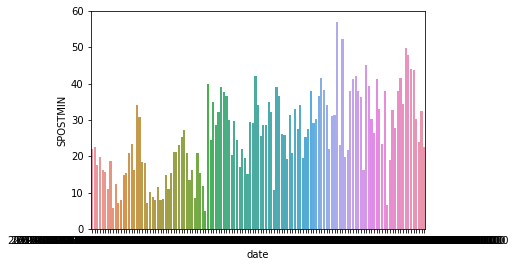

In [57]:
#Group by season
seasonal = meta_pirates1.groupby('SEASON')
christmas_pirates = seasonal.get_group('CHRISTMAS')
#print(christmas_pirates.head())
#Plot times for everyday wait time throughout the years 
#christmas_pirates.plot(x="date", y = "SPOSTMIN")
ax = sns.barplot(x = "date", y = "SPOSTMIN", data = christmas_pirates)
christmas_pirates.mean()

#Mean wait time for christmas season:
christmas_pirates.loc[:,"SPOSTMIN"].mean()

summer = seasonal.get_group('SUMMER BREAK') #271 rows
summer

In [42]:
meta_pirates1.groupby('SEASON').count()

#Only getting yearly data:
pirates2012 = meta_pirates1.loc[meta_pirates1.YEAR == 2012]
pirates2012.groupby('SEASON').count().sum()
pirates2012.groupby('SEASON').count()

piratessummer = meta_pirates1.loc[meta_pirates1.SEASON == "SUMMER BREAK"]
piratessummer

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
178,2012-07-01,9.000000,NaN,1,182,27,7,2012,SUMMER BREAK,4,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
184,2012-07-07,5.000000,NaN,7,188,27,7,2012,SUMMER BREAK,4,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
185,2012-07-08,8.571429,NaN,1,189,28,7,2012,SUMMER BREAK,5,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
186,2012-07-09,21.000000,NaN,2,190,28,7,2012,SUMMER BREAK,6,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
187,2012-07-10,16.875000,NaN,3,191,28,7,2012,SUMMER BREAK,7,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
188,2012-07-11,17.500000,NaN,4,192,28,7,2012,SUMMER BREAK,8,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
189,2012-07-12,14.642857,NaN,5,193,28,7,2012,SUMMER BREAK,9,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
190,2012-07-13,18.750000,NaN,6,194,28,7,2012,SUMMER BREAK,10,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
191,2012-07-14,10.000000,NaN,7,195,28,7,2012,SUMMER BREAK,11,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
192,2012-07-15,11.666667,NaN,1,196,29,7,2012,SUMMER BREAK,12,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN


In [13]:
####dont need

#sum all posted wait times by day
sum_by_day = meta_pirates.groupby('date')['SPOSTMIN'].sum()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.head()

date
2012-01-01      50.0
2012-01-02     285.0
2012-01-03     225.0
2012-01-04     230.0
2012-01-05     355.0
2012-01-06     325.0
2012-01-07     205.0
2012-01-08     420.0
2012-01-09     150.0
2012-01-10      80.0
2012-01-11      30.0
2012-01-12     280.0
2012-01-13     155.0
2012-01-14     235.0
2012-01-15     145.0
2012-01-16      40.0
2012-01-17      55.0
2012-01-18      35.0
2012-01-19      10.0
2012-01-20     175.0
2012-01-21     335.0
2012-01-22      75.0
2012-01-23      45.0
2012-01-24     145.0
2012-01-25      35.0
2012-01-27      55.0
2012-01-28     235.0
2012-01-29     240.0
2012-01-30      45.0
2012-01-31      80.0
               ...  
2019-04-01    4560.0
2019-04-02    4075.0
2019-04-03    4090.0
2019-04-04    4220.0
2019-04-05    3525.0
2019-04-06    3990.0
2019-04-07    2450.0
2019-04-08    2705.0
2019-04-09    2070.0
2019-04-10    3105.0
2019-04-11    2980.0
2019-04-12    3605.0
2019-04-13    2245.0
2019-04-14    2750.0
2019-04-15    5345.0
2019-04-16    5025.0
2019-04-

,date,SPOSTMIN
0,2012-01-01,50.0
1,2012-01-02,285.0
2,2012-01-03,225.0
3,2012-01-04,230.0
4,2012-01-05,355.0
